# 🇨🇦 Analysis of Canadian Residential Rental Prices using Logistic Regression and K - Nearest Neighbours Classification Models 🇨🇦

This notebook classifies rent prices into high and low categories based on location and unit type.


## **Dataset Overview and Introduction**

The dataset used for this analysis provides historical rental price data for various cities contained in all Provinces across Canada. It contains 69,532 records and covers rental trends over a span of 37 years (1987-2024).

### **Objective:**
This notebook focuses on classifying rental prices into high and low categories based on location and unit type. It therefore utilizes **Logistic Regression** and **K-Nearest Neighbors (KNN)** models to predict these categories.

---

### **Data Overview:**
- **Total Entries:** 69,532
- **Features:**
  - **Province, City, Year, Average Rent, Unit Type, Unit Description**
- **Target Variable:** Rent prices categorized into two groups (High vs. Low)

---

### **Feature Breakdown**

The dataset consists of **six columns**:

1. **Province** - The Canadian province where the rental data was collected.
2. **City** - The specific city in the province.
3. **Year** - The year when the rental price data was recorded. ( 1987 - 2024)
4. **AverageRent** - The average rent price in the respective city for the given year.
5. **UnitType** - The type of rental unit.
6. **UnitDescription** - A standardized description of the general building layout for each "unit types".

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the dataset

In [2]:
df = pd.read_csv("Canada_Rent_1987-2024_NO ZEROS.csv", encoding="latin1")
df.head()

,Province,City,Year,AverageRent,UnitType,UnitDescription
0,Newfoundland and Labrador,Corner Brook,1987,480,Two bedroom units,Apartment structures of six units and over
1,Newfoundland and Labrador,Gander,1987,370,One bedroom units,Apartment structures of six units and over
2,Newfoundland and Labrador,Gander,1987,414,Two bedroom units,Apartment structures of six units and over
3,Newfoundland and Labrador,Gander,1987,414,Three bedroom units,Apartment structures of six units and over
4,Newfoundland and Labrador,Labrador City,1987,254,One bedroom units,Apartment structures of six units and over


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69532 entries, 0 to 69531
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Province         69532 non-null  object
 1   City             69532 non-null  object
 2   Year             69532 non-null  int64 
 3   AverageRent      69532 non-null  int64 
 4   UnitType         69532 non-null  object
 5   UnitDescription  69532 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,69532.0,2007.715412,9.921874,1987.0,1999.0,2008.0,2016.0,2024.0
AverageRent,69532.0,680.042757,302.502535,169.0,464.0,610.0,820.0,2961.0


## Data Cleaning & Processing
- Check for missing data
- Check for duplicated values
- Rent pices will then be categorized into two groups and categorical features will then encoded.

In [5]:
# Check for missing values
df.isnull().sum()

Province           0
City               0
Year               0
AverageRent        0
UnitType           0
UnitDescription    0
dtype: int64

In [6]:
# Check for duplicated values 
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(69532, 6)

In [8]:
# Rent pices are categorized into two groups and categorical features are then encoded. 

df['RentCategory'] = pd.qcut(df['AverageRent'], q=2, labels=[0, 1])  # Binary classification
features = ["Province", "City", "Year", "UnitType"]
target = "RentCategory"

# Encode categorical variables
label_encoders = {}
for col in features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
display(df.head())

,Province,City,Year,AverageRent,UnitType,UnitDescription,RentCategory
0,6,31,0,480,3,Apartment structures of six units and over,0
1,6,50,0,370,1,Apartment structures of six units and over,0
2,6,50,0,414,3,Apartment structures of six units and over,0
3,6,50,0,414,2,Apartment structures of six units and over,0
4,6,83,0,254,1,Apartment structures of six units and over,0


### Modeling the Data

In [9]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training Classification Models
Using Logistic Regression and K-Nearest Neighbors.

In [10]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

### Model Evaluation
Comparing accuracy and classification reports.

In [23]:
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      6956
           1       0.78      0.79      0.79      6951

    accuracy                           0.79     13907
   macro avg       0.79      0.79      0.79     13907
weighted avg       0.79      0.79      0.79     13907



In [24]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.785935140576688


In [25]:
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn))


Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      6956
           1       0.92      0.94      0.93      6951

    accuracy                           0.93     13907
   macro avg       0.93      0.93      0.93     13907
weighted avg       0.93      0.93      0.93     13907



In [26]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9278061407924068


### Confusion Matrix
Visualizing the model predictions.

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

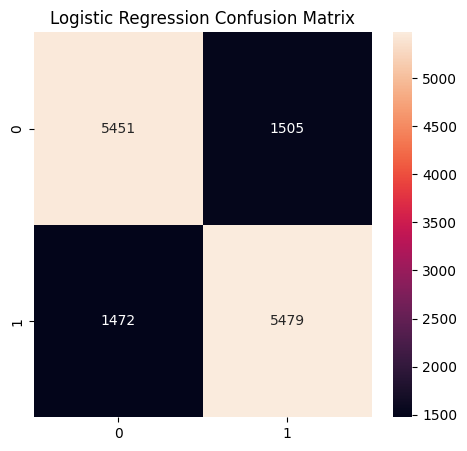

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")

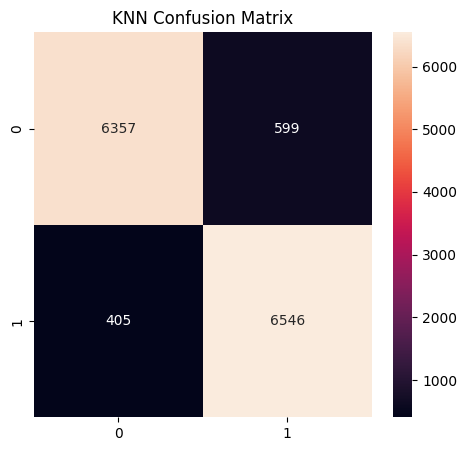

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title("KNN Confusion Matrix")
plt.show()


## 🍁 **Observation Summary and Analysis of Results** 🍁

### **Model Evaluation Results:**
1. **Logistic Regression:**
   - **Accuracy:** **78.6%**
   - **Comments on Classification Model Results:**
     - The Precision, recall, and f1-score are all approximately **0.79** for both high and low categories.
     - **This Model is balanced but lacks higher precision**.
  
2. **K-Nearest Neighbors (KNN, k=15):**
   - **Accuracy:** **92.8%**
   - **Comments on Classification Model Results:**
     - There is stronger precision and recall, achieving a **0.93 f1-score**.
     - **This model has a Higher accuracy compared to Logistic Regression.**
---

### **Key Observations**
- **KNN performed significantly better than Logistic Regression,** likely due to the spatial and categorical nature of rental price data (where similar locations and unit types have strong relationships).
- **Logistic Regression had slightly lower precision and recall,** indicating that it may struggle to separate class boundaries effectively.
- **Confusion Matrix results** show that KNN mis-classified fewer data points, making it a stronger candidate for rent classification tasks.

